#GloVe

## **개발 배경**
**Word2Vec**
* 중심단어로 주변단어를, 주변단어로 중심단어를 예측하는 과정에서 단어를 벡터로 임베딩하는 방법론. 
* 임베딩된 단어의 벡터의 내적이 코사인 유사도가 되도록 함.
* 단점: 저차원 벡터공간에 임베딩된 단어벡터 사이의 유사도를 측정하는 것에는 좋은 성능, 하지만 사용자가 지정한 window(주변 단어 몇개만 볼지) 내에서만 학습/분석이 이뤄지기 때문에 코퍼스(말뭉치) 전체의 동시등정보(co-occurrence)는 반영되기 어려움.

**LSA(잠재의미분석)**
* 단어-문맥행렬에 특이값분해(SVD)를 실시해 데이터 차원을 효과적으로 축소하는 한편 노이즈 등을 줄여 내재적인 의미를 이끌어내는 임베딩 방법론
* 코퍼스의 전체적인 통계 정보를 입력으로 받음.
* 단점: LSA 결과물을 가지고 단어/문서 간 유사도를 측정하기는 어려움. (예: 왕:남자 = 여왕:? (정답은 여자)와 같은 단어 의미의 유추 작업)

## **GloVe 의 목표**
“임베딩된 단어벡터 간 유사도 측정을 수월하게 하면서도 말뭉치 전체의 통계 정보를 좀 더 잘 반영해보자”

## **GloVe의 핵심**
임베딩된 두 단어벡터의 내적이 코퍼스 전체에서의 동시 등장확률 로그값이 되도록 목적함수를 정의


## Window 기반의 동시등장행렬

Ex)
I like deep learning

I like NLP

I enjoy flying

윈도우=n 이면 좌우 n개의 단어만 참고.

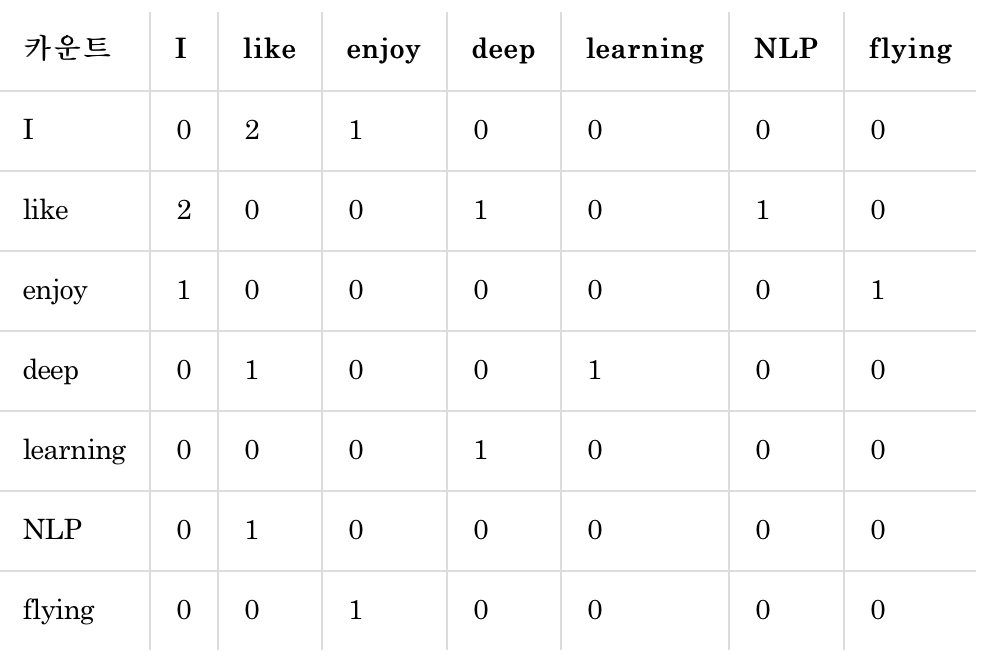

## 동시등장 확률
 
P(k|i): 동시등장행렬로부터 특정 단어 i의 전체 등장 횟수를 카운트하고, 특정 단어 i가 등장했을 때 어떤 단어 k가 등장한 횟수를 카운트하여 계산한 조건부 확률. 
*  i 가 등장했을 때, k가 등장할 확률
*  P(solid l ice) / P(solid l steam)= 8.9

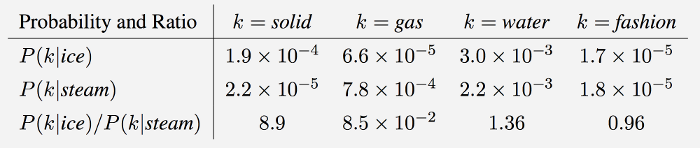

## **'임베딩 된 중심 단어와 주변 단어 벡터의 내적이 전체 코퍼스에서의 동시 등장 확률이 되도록 만드는 것'**

  *(예1: solid 주어짐-> ice와 steam 벡터 사이의 내적값이 8.9가 되도록*

* 코퍼스 전체를 학습시키다 보면 ice, stream이 k가 될 수도 있고, 반대가 될 수도 있음. 

## 𝐹(𝑤𝑖,𝑤𝑗,𝑤𝑘~)=𝑃𝑖𝑘/𝑃𝑗𝑘


  =>그러한 목적함수 F는 두 단어 사이의 동시 등장 확률의 크기 관계 **비(ratio)** 정보를 벡터 공간에 인코딩해야 함.

## 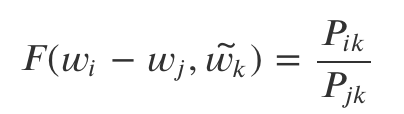

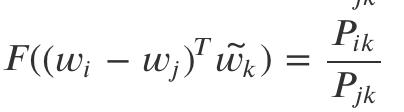

i번째단어 j번째단어 k주변단어의 임베딩 벡터

#**목적함수 F의 두가지 조건**

##1. 준동형(Homomorphism)
조건1
* 전체 코퍼스 학습-> 실제로는 i,k 무작위 선택
* 이 둘의 관계는 자유롭게 교환될 수 있도록 해야함
* 함수 F가 실수의 셈과 양수의 곱셈에 대해서 준동형(Homomorphism)을 만족하도록 합니다.
조건2


F
(
a
+
b
)
=
F
(
a
)
F
(
b
)
, 
∀
a
, 
b
∈
R

##2. 대칭행렬 특성 포함
 co-occurrence matrix 𝑋는 대칭행렬(symmetric matrix)이므로 함수 𝐹는 이러한 성질을 포함해야 함.


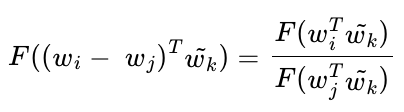

#손실함수



In [ ]:
pip install glove_python

     |████████████████████████████████| 266kB 12.1MB/s 
  ERROR: Failed building wheel for glove-python
  Running setup.py clean for glove-python
  ERROR: Failed cleaning build dir for glove-python
Failed to build glove-python
    Running setup.py install for glove-python ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-0ejte700/glove-python/setup.py'"'"'; __file__='"'"'/tmp/pip-install-0ejte700/glove-python/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-llih33m2/install-record.txt --single-version-externally-managed --compile Check the logs for full command output.


In [ ]:
from glove import Corpus, Glove

corpus = Corpus() 
corpus.fit(result, window=5)
# 훈련 데이터로부터 GloVe에서 사용할 동시 등장 행렬 생성

glove = Glove(no_components=100, learning_rate=0.05)
glove.fit(corpus.matrix, epochs=20, no_threads=4, verbose=True)
glove.add_dictionary(corpus.dictionary)
# 학습에 이용할 쓰레드의 개수는 4로 설정, 에포크는 20.

In [ ]:
model_result1=glove.most_similar("man")
print(model_result1)